In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [2]:
df_id = pd.read_csv('train_identity.csv')
df_trans = pd.read_csv('train_transaction.csv')

In [4]:
df_id.shape

(144233, 41)

In [6]:
df_trans.shape

(590540, 394)

In [15]:
df_comb = pd.merge(df_id, df_trans, on='TransactionID', how='right')

In [16]:
df_comb.shape

(590540, 434)

In [18]:
len(df_comb[df_comb["isFraud"]==1])/len(df_comb)*100

3.4990009144173126

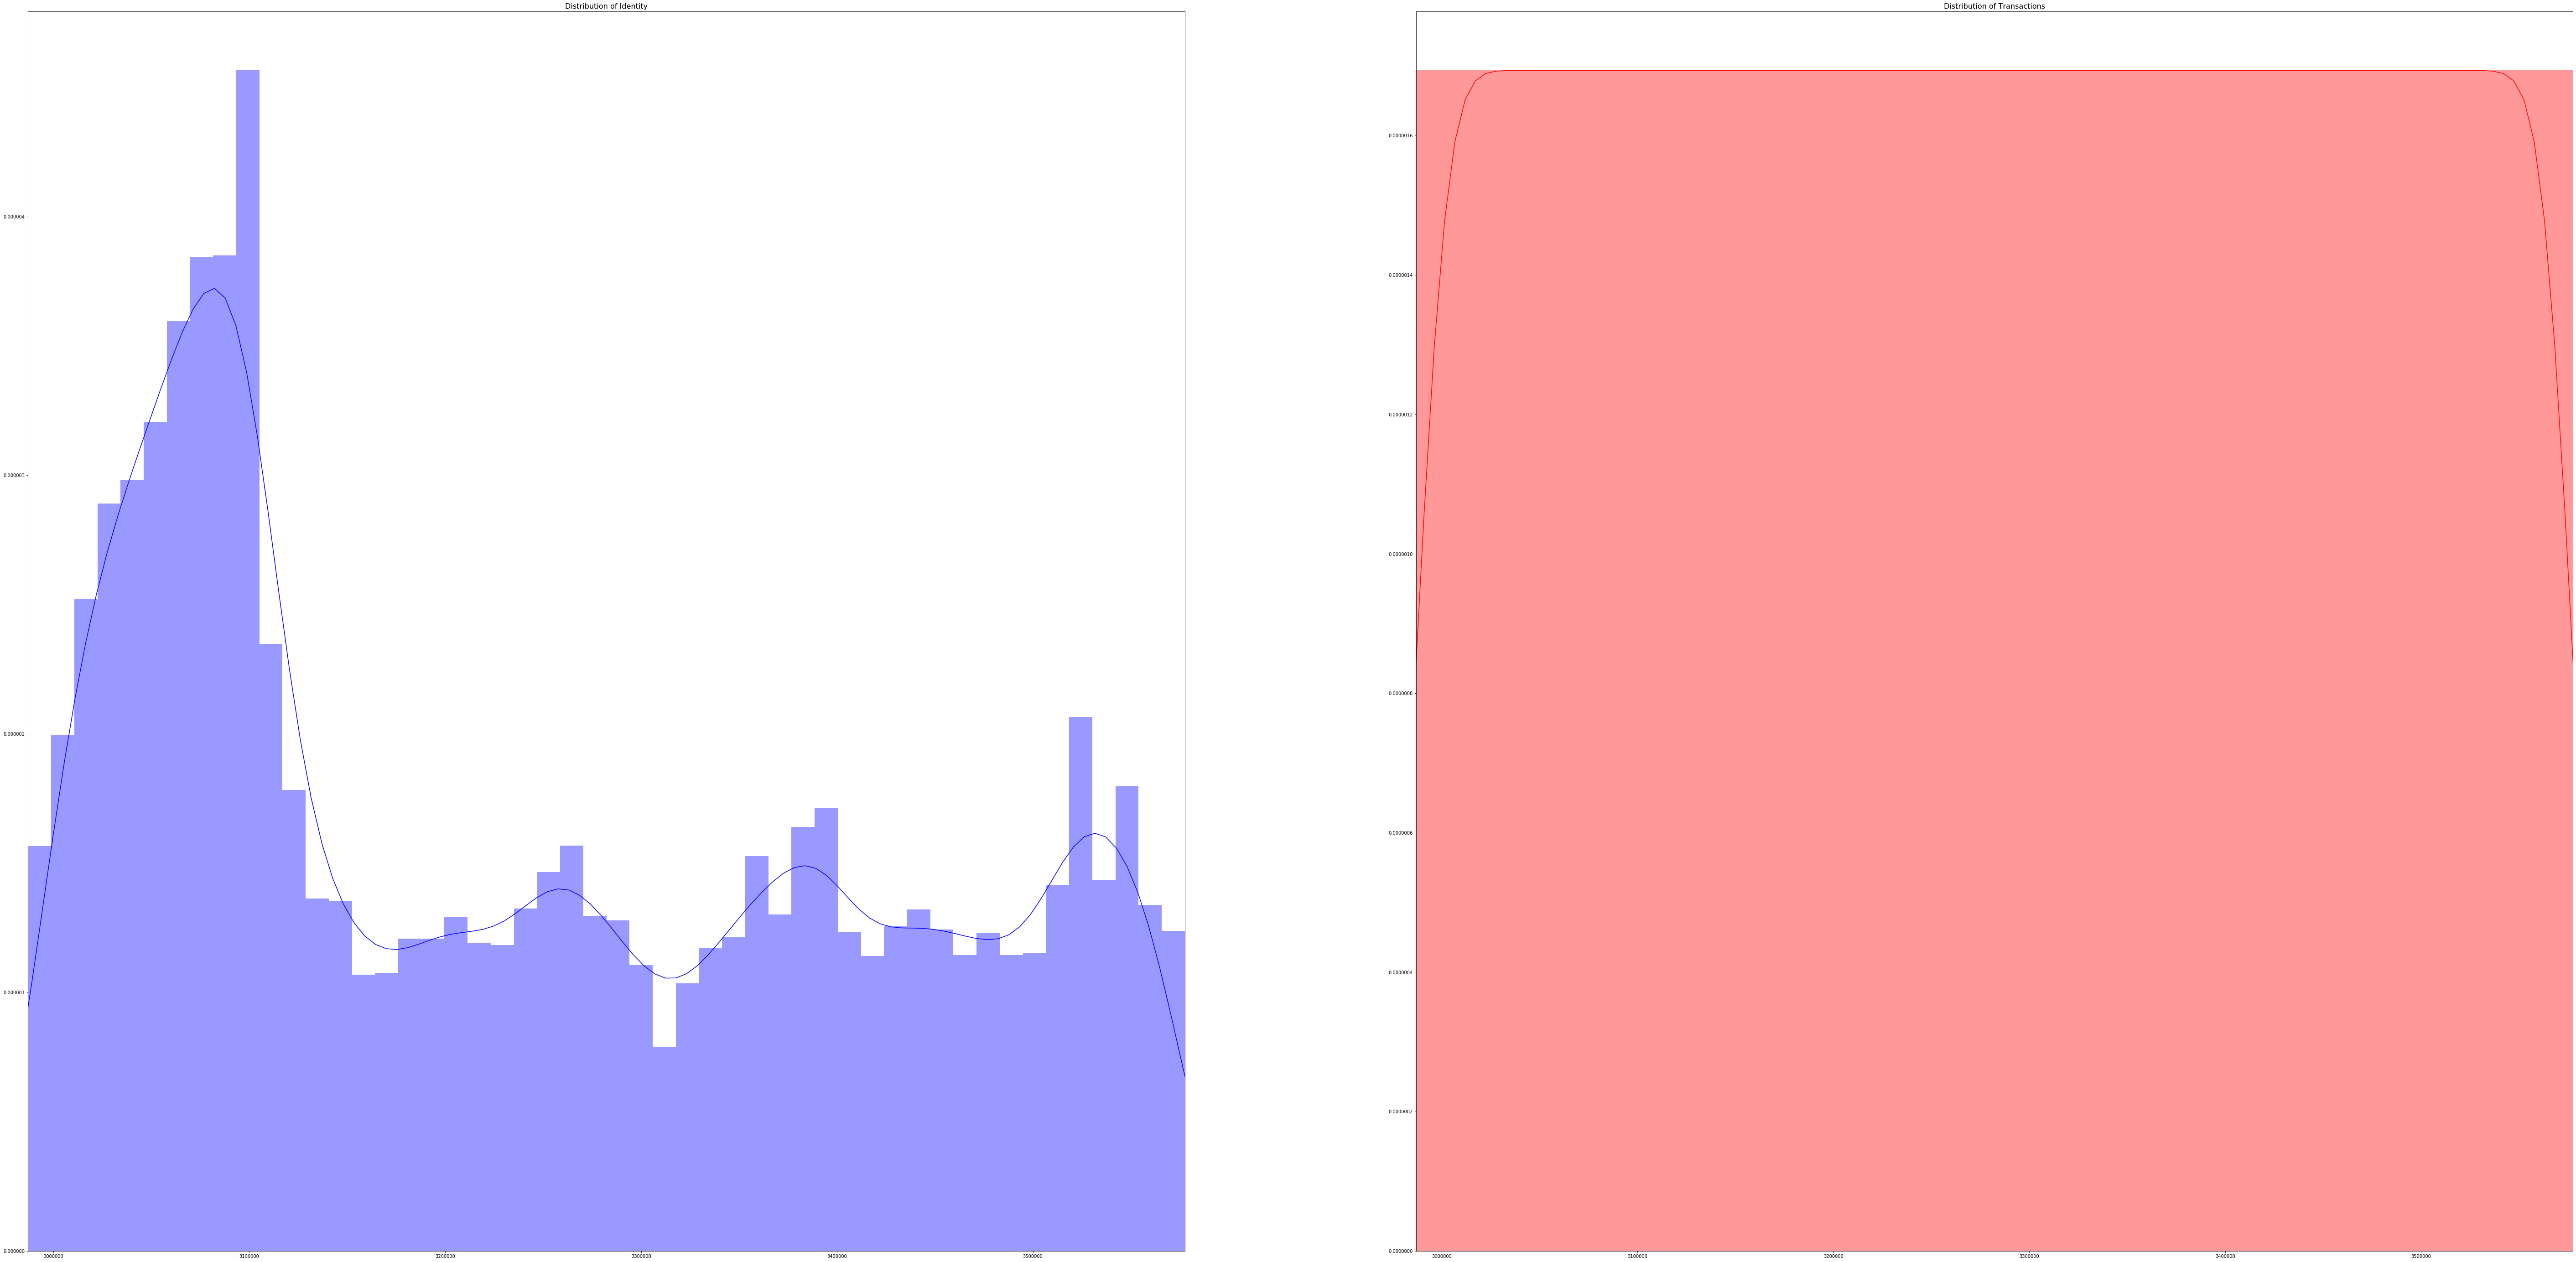

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(100,50))

id_val = df_id['TransactionID'].values
trans_val = df_trans['TransactionID'].values

sns.distplot(id_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Identity', fontsize=16)
ax[0].set_xlim([min(id_val), max(id_val)])

sns.distplot(trans_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transactions', fontsize=16)
ax[1].set_xlim([min(trans_val), max(trans_val)])

plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

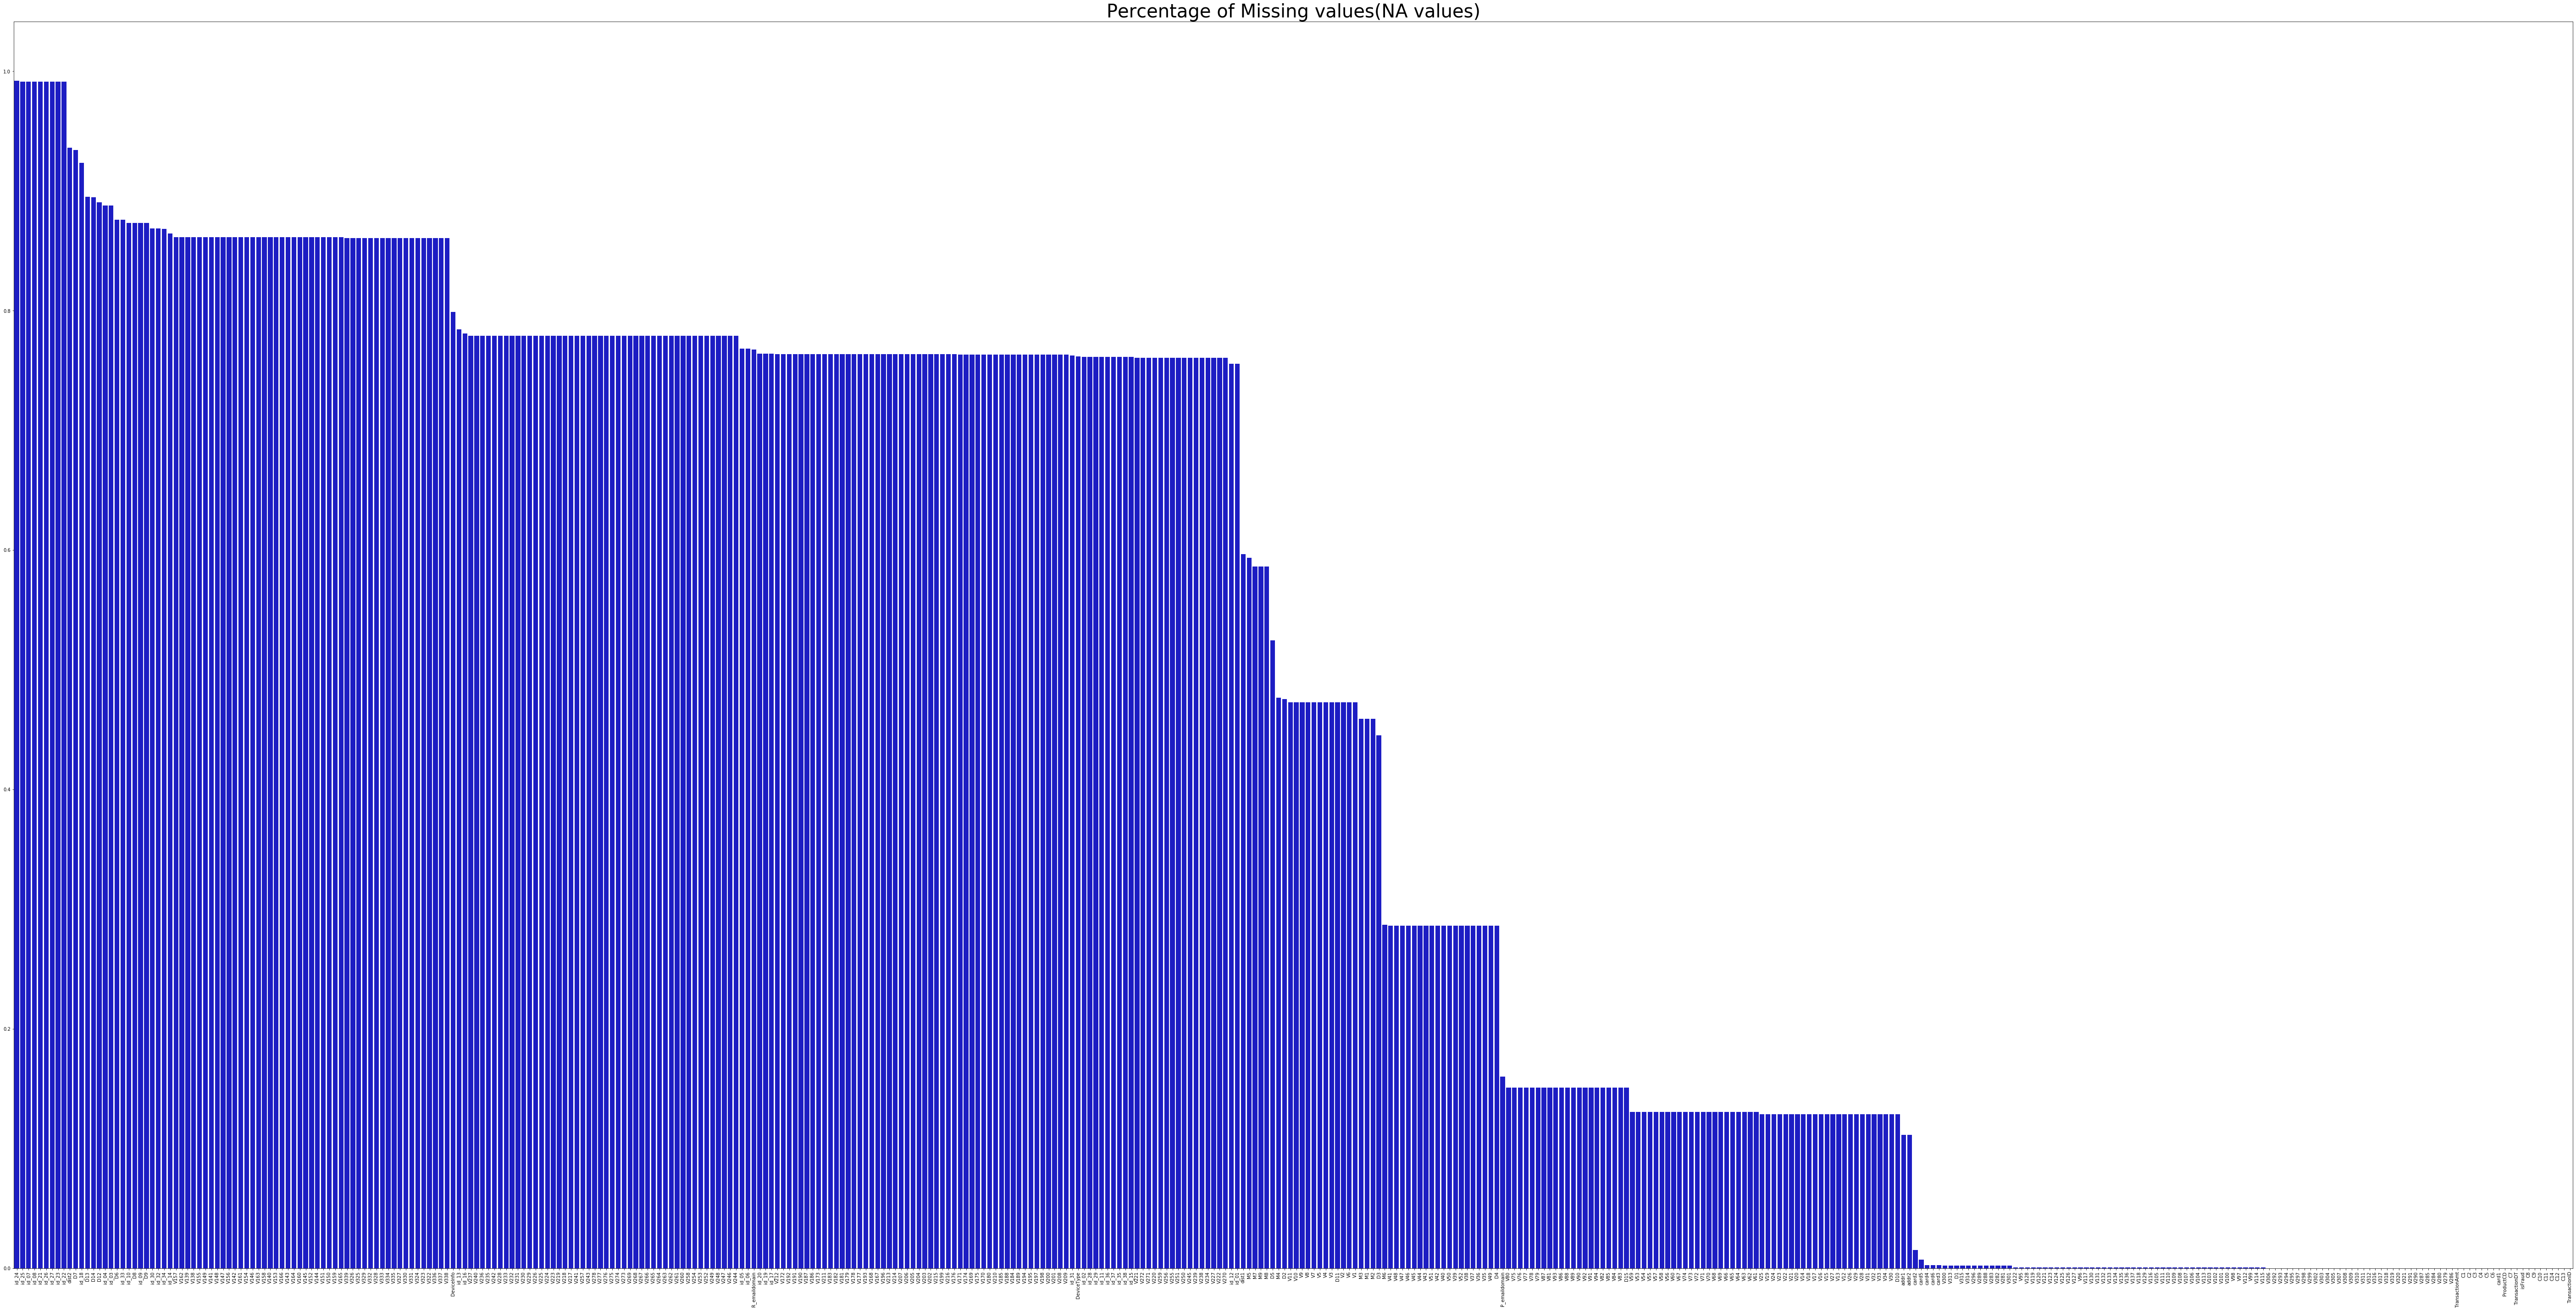

In [28]:
plt.figure(figsize=(100,50))
colors = {'#0101DF'}
sns.barplot(y=df_comb.isnull().sum().sort_values(ascending=False)/len(df_comb),
           x=df_comb.isnull().sum().sort_values(ascending=False).index,
           palette=colors)
plt.title('Percentage of Missing values(NA values)', fontsize=40)
plt.xticks(rotation=90)

In [30]:
columns_df_comb=pd.DataFrame({"Missing_count":df_comb.isnull().sum().sort_values(ascending=False)})

In [31]:
columns_df_comb["per"]=columns_df_comb["Missing_count"]/len(df_comb)

In [32]:
range=[0.05, 0.10, 0.20, 0.40, 0.50, 0.75]

In [34]:
for i in range:
    print(columns_df_comb[columns_df_comb["per"]<i].shape[0]/df_comb.shape[1])

0.25806451612903225
0.25806451612903225
0.41935483870967744
0.46543778801843316
0.5069124423963134
0.5207373271889401


In [35]:
limit=0.20

In [36]:
columns_final_comb=columns_df_comb[columns_df_comb["per"]<limit].index

df_comb=df_comb[df_comb.columns.intersection(columns_final_comb)]

In [37]:
df_comb[df_comb.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6,P_emaildomain
0,H,mastercard,credit,gmail.com
1,H,visa,debit,anonymous.com
2,C,mastercard,credit,gmail.com
3,C,mastercard,debit,hotmail.com
4,H,visa,debit,aol.com
5,H,mastercard,credit,yahoo.com
6,H,visa,credit,gmail.com
7,S,american express,credit,NaN
8,C,visa,credit,gmail.com
9,C,visa,debit,outlook.com


In [38]:
card6_df_dummy=pd.get_dummies(df_comb["card6"])

In [39]:
df_comb.shape

(590540, 182)

In [40]:
df_comb=pd.concat([df_comb,card6_df_dummy],axis=1)

In [42]:
df_comb=df_comb._get_numeric_data()
df_comb=df_comb.dropna()

In [43]:
len(df_comb[df_comb["isFraud"]==1])/len(df_comb)*100

2.0285100658469233

In [45]:
x_df_full=df_comb.drop(["isFraud"],axis=1)
y_df_full=df_comb["isFraud"]

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x_df_full, y_df_full, test_size=0.50)

In [49]:
lg_r = LogisticRegression(solver='lbfgs')
lg_r.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lg_r.score(x_test, y_test)

0.9801090368412357

In [51]:
y_pred=lg_r.predict(x_test)

In [52]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,207641,22,207663
1,4192,0,4192
All,211833,22,211855


In [53]:
recall_score(y_test, y_pred)

0.0

In [54]:
accuracy_score(y_test, y_pred)

0.9801090368412357

In [55]:
recall_score(y_test, y_pred)

0.0